# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [39]:
import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv(r'C:\UFT data science program\DSI_1\scaling_to_production\05_src\data\fires\forestfires.csv', header = None, names = columns))


# Get X and Y

Create the features data frame and target data.

In [40]:
# Extract the features (all columns except 'area')
X = fires_dt.drop(columns=['area'])

# Extract the target (the 'area' column)
Y = fires_dt['area']

# Display the first few rows of X and Y to verify
print("Features (X):")
print(X.head())

print("\nTarget (Y):")
print(Y.head())


Features (X):
  coord_x coord_y  month  day  ffmc   dmc     dc  isi  temp  rh  wind  rain
0       X       Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain
1       7       5    mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7     0
2       7       4    oct  tue  90.6  35.4  669.1  6.7    18  33   0.9     0
3       7       4    oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3     0
4       8       6    mar  fri  91.7  33.3   77.5    9   8.3  97     4   0.2

Target (Y):
0    area
1       0
2       0
3       0
4       0
Name: area, dtype: object


In [41]:
print(fires_dt)


    coord_x coord_y  month  day  ffmc   dmc     dc   isi  temp  rh  wind  \
0         X       Y  month  day  FFMC   DMC     DC   ISI  temp  RH  wind   
1         7       5    mar  fri  86.2  26.2   94.3   5.1   8.2  51   6.7   
2         7       4    oct  tue  90.6  35.4  669.1   6.7    18  33   0.9   
3         7       4    oct  sat  90.6  43.7  686.9   6.7  14.6  33   1.3   
4         8       6    mar  fri  91.7  33.3   77.5     9   8.3  97     4   
..      ...     ...    ...  ...   ...   ...    ...   ...   ...  ..   ...   
513       4       3    aug  sun  81.6  56.7  665.6   1.9  27.8  32   2.7   
514       2       4    aug  sun  81.6  56.7  665.6   1.9  21.9  71   5.8   
515       7       4    aug  sun  81.6  56.7  665.6   1.9  21.2  70   6.7   
516       1       4    aug  sat  94.4   146  614.7  11.3  25.6  42     4   
517       6       3    nov  tue  79.5     3  106.7   1.1  11.8  31   4.5   

     rain   area  
0    rain   area  
1       0      0  
2       0      0  
3       0  

In [42]:
# Convert 'area' column from string to float
fires_dt['area'] = pd.to_numeric(fires_dt['area'], errors='coerce')

In [43]:
print(fires_dt['area'].dtype)

float64


# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np

# Assuming fires_dt is already loaded with the data
# Convert columns to their appropriate data types

# Numeric columns
numeric_features = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
fires_dt[numeric_features] = fires_dt[numeric_features].apply(pd.to_numeric, errors='coerce')

# Categorical columns
categorical_features = ['month', 'day']
fires_dt[categorical_features] = fires_dt[categorical_features].astype(str)

# Separate the features (X) and target (Y) again
X = fires_dt.drop(columns=['area'])
Y = fires_dt['area']

# Define the transformations for numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='infrequent_if_exist')

# Combine the transformations using ColumnTransformer
preproc1 = ColumnTransformer(
    transformers=[
        ('num_trans', numeric_transformer, numeric_features),
        ('cat_trans', categorical_transformer, categorical_features)
    ]
)

# To check the pipeline and transformed features, we can fit_transform on X
X_transformed = preproc1.fit_transform(X)

# Print the shape of the transformed feature matrix to see the result
print("Transformed features shape:", X_transformed.shape)

# Get the column names after transformation
num_cols = numeric_features
cat_cols = preproc1.named_transformers_['cat_trans'].get_feature_names_out(categorical_features)

# Combine numeric and categorical column names
transformed_columns = np.hstack((num_cols, cat_cols))

# Convert the transformed data back to a DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=transformed_columns)

# Display the first few rows of the transformed DataFrame
print(X_transformed_df.head())


Transformed features shape: (518, 31)
    coord_x   coord_y      ffmc       dmc        dc       isi      temp  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  1.008313  0.569860 -0.805959 -1.323326 -1.830477 -0.860946 -1.842640   
2  1.008313 -0.244001 -0.008102 -1.179541  0.488891 -0.509688 -0.153278   
3  1.008313 -0.244001 -0.008102 -1.049822  0.560715 -0.509688 -0.739383   
4  1.440925  1.383722  0.191362 -1.212361 -1.898266 -0.004756 -1.825402   

         rh      wind      rain  ...  month_oct  month_sep  day_day  day_fri  \
0       NaN       NaN       NaN  ...        0.0        0.0      1.0      0.0   
1  0.411724  1.498614 -0.073268  ...        0.0        0.0      0.0      1.0   
2 -0.692456 -1.741756 -0.073268  ...        1.0        0.0      0.0      0.0   
3 -0.692456 -1.518282 -0.073268  ...        1.0        0.0      0.0      0.0   
4  3.233519 -0.009834  0.603155  ...        0.0        0.0      0.0      1.0   

   day_mon  day_sat  day_sun  

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer
import pandas as pd
import numpy as np

# Assuming fires_dt is already loaded with the data
# Convert columns to their appropriate data types

# Numeric columns
numeric_features = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
fires_dt[numeric_features] = fires_dt[numeric_features].apply(pd.to_numeric, errors='coerce')

# Categorical columns
categorical_features = ['month', 'day']
fires_dt[categorical_features] = fires_dt[categorical_features].astype(str)

# Separate the features (X) and target (Y)
X = fires_dt.drop(columns=['area'])
Y = fires_dt['area']

# Define separate numeric features for log transformation
log_transform_features = ['dc', 'isi']
scaling_only_features = [feat for feat in numeric_features if feat not in log_transform_features]

# Define the transformations for numeric and categorical features for preproc2
# Imputation for numeric features
numeric_imputer = SimpleImputer(strategy='mean')  # Fill missing numeric values with the mean

# Min-Max scaling for numeric features that are not log-transformed
numeric_transformer2_scaling_only = Pipeline(steps=[
    ('imputer', numeric_imputer),  # Impute missing values
    ('scaler', MinMaxScaler())  # Min-Max scaling
])

# Min-Max scaling and log transformation for selected numeric features
numeric_transformer2_log = Pipeline(steps=[
    ('imputer', numeric_imputer),  # Impute missing values
    ('scaler', MinMaxScaler()),  # Min-Max scaling
    ('log', FunctionTransformer(np.log1p, validate=True))  # Log transformation
])

# Imputation for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Fill missing categorical values with the most frequent value

# One-Hot Encoder for categorical features
categorical_transformer2 = Pipeline(steps=[
    ('imputer', categorical_imputer),  # Impute missing values
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))  # One-hot encoding
])

# Combine the transformations using ColumnTransformer for preproc2
preproc2 = ColumnTransformer(
    transformers=[
        ('num_scaling', numeric_transformer2_scaling_only, scaling_only_features),  # Apply Min-Max scaling to non-log-transformed numeric columns
        ('num_log', numeric_transformer2_log, log_transform_features),  # Apply Min-Max scaling and log transformation to selected numeric columns
        ('cat', categorical_transformer2, categorical_features)  # Apply one-hot encoding to categorical columns
    ]
)

# Fit and transform the data using preproc2
X_transformed2 = preproc2.fit_transform(X)

# Print the shape of the transformed feature matrix to see the result
print("Transformed features shape using preproc2:", X_transformed2.shape)

# Convert the transformed data back to a DataFrame for inspection
# Get the column names after transformation for preproc2
num_cols_transformed = scaling_only_features + log_transform_features  # Combine columns that were scaled and log-transformed
cat_cols_transformed = preproc2.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)

# Combine numeric and categorical column names
transformed_columns2 = np.hstack((num_cols_transformed, cat_cols_transformed))

# Convert the transformed data back to a DataFrame
X_transformed_df2 = pd.DataFrame(X_transformed2, columns=transformed_columns2)

# Display the first few rows of the transformed DataFrame
print(X_transformed_df2.head())


Transformed features shape using preproc2: (518, 29)
    coord_x   coord_y      ffmc       dmc      temp        rh      wind  \
0  0.458656  0.328544  0.928318  0.378264  0.536629  0.344567  0.401956   
1  0.750000  0.428571  0.870968  0.086492  0.192926  0.423529  0.700000   
2  0.750000  0.285714  0.927742  0.118194  0.508039  0.211765  0.055556   
3  0.750000  0.285714  0.927742  0.146795  0.398714  0.211765  0.100000   
4  0.875000  0.571429  0.941935  0.110958  0.196141  0.964706  0.400000   

       rain        dc       isi  ...  month_nov  month_oct  month_sep  \
0  0.003385  0.490621  0.149121  ...        0.0        0.0        0.0   
1  0.000000  0.096514  0.087011  ...        0.0        0.0        0.0   
2  0.000000  0.574037  0.112819  ...        0.0        1.0        0.0   
3  0.000000  0.585726  0.112819  ...        0.0        1.0        0.0   
4  0.031250  0.078463  0.148789  ...        0.0        0.0        0.0   

   day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [12]:
from sklearn.linear_model import LinearRegression
# Define the target variable
y = fires_dt['area']

# Define features excluding the target variable
X = fires_dt.drop('area', axis=1)

# Define preprocessing steps for numeric features
numeric_features = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize numeric features
])

# Define preprocessing steps for categorical features
categorical_features = ['month', 'day']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(drop='first'))  # One-hot encode categorical features
])

# Combine preprocessing for numeric and categorical features using ColumnTransformer
preproc1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the baseline regressor
baseline_regressor = LinearRegression()

# Combine preprocessing and regressor into a pipeline
pipeline_A = Pipeline(steps=[
    ('preprocessing', preproc1),  # ColumnTransformer from preproc1
    ('regressor', baseline_regressor)  # Baseline regressor
])



pipeline_A

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['month', 'day'])])),
                ('regressor', LinearRegression())])

In [13]:
# Pipeline B = preproc2 + baseline

# Define preprocessing pipeline for numeric features (preproc2)
numeric_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', MinMaxScaler()),  # Apply Min-Max scaling
    ('log_transform', FunctionTransformer(np.log1p, validate=True))  # Log transform
])

# Define preprocessing pipeline for categorical features (preproc2)
categorical_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(drop='first'))  # One-hot encode categorical features
])

# Combine preprocessing for numeric and categorical features using ColumnTransformer (preproc2)
preproc2 = ColumnTransformer(
    transformers=[
        ('num_scaling_log', numeric_transformer2, numeric_features),  # Apply Min-Max scaling and log transformation
        ('cat', categorical_transformer2, categorical_features)  # One-hot encode categorical features
    ])

# Define the baseline regressor (same as Pipeline A)
baseline_regressor = LinearRegression()

# Combine preprocessing and regressor into Pipeline B
pipeline_B = Pipeline(steps=[
    ('preprocessing', preproc2),  # ColumnTransformer from preproc2
    ('regressor', baseline_regressor)  # Baseline regressor
])

pipeline_B


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_scaling_log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True))]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['month', 'day'])])),
                ('regressor', LinearRegression())])

In [14]:
# Pipeline C = preproc1 + advanced model
from sklearn.ensemble import RandomForestRegressor
# Define preprocessing pipeline for numeric features (preproc1)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize numeric features
])

# Define preprocessing pipeline for categorical features (preproc1)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(drop='first'))  # One-hot encode categorical features
])

# Combine preprocessing for numeric and categorical features using ColumnTransformer (preproc1)
preproc1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the advanced regressor (Random Forest Regressor)
advanced_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Combine preprocessing and regressor into Pipeline C
pipeline_C = Pipeline(steps=[
    ('preprocessing', preproc1),  # ColumnTransformer from preproc1
    ('regressor', advanced_regressor)  # Advanced regressor
])

pipeline_C


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['month', 'day'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [15]:
# Pipeline D = preproc2 + advanced model

# Define preprocessing pipeline for numeric features (preproc2)
numeric_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', MinMaxScaler()),  # Apply Min-Max scaling
    ('log_transform', FunctionTransformer(np.log1p, validate=True))  # Log transform
])

# Define preprocessing pipeline for categorical features (preproc2)
categorical_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(drop='first'))  # One-hot encode categorical features
])

# Combine preprocessing for numeric and categorical features using ColumnTransformer (preproc2)
preproc2 = ColumnTransformer(
    transformers=[
        ('num_scaling_log', numeric_transformer2, numeric_features),  # Apply Min-Max scaling and log transformation
        ('cat', categorical_transformer2, categorical_features)  # One-hot encode categorical features
    ])

# Define the advanced regressor (Random Forest Regressor)
advanced_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Combine preprocessing and regressor into Pipeline D
pipeline_D = Pipeline(steps=[
    ('preprocessing', preproc2),  # ColumnTransformer from preproc2
    ('regressor', advanced_regressor)  # Advanced regressor
])

pipeline_D


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_scaling_log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True))]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['month', 'day'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [17]:
from sklearn.model_selection import GridSearchCV

# Combine preprocessing for numeric and categorical features using ColumnTransformer
preproc1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the baseline regressor
baseline_regressor = LinearRegression()

# Combine preprocessing and regressor into a pipeline
pipeline_A = Pipeline(steps=[
    ('preprocessing', preproc1),  # ColumnTransformer from preproc1
    ('regressor', baseline_regressor)  # Baseline regressor
])
param_grid_A = {
    'regressor__fit_intercept': [True, False],
    'regressor__normalize': [True, False]
}
# Perform GridSearchCV for each pipeline
grid_search_A = GridSearchCV(pipeline_A, param_grid_A, cv=5)
grid_search_A

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False],
                         'regressor__normalize': [True, False]})

In [18]:

# Define the pipelines with different regressors
pipeline_B = Pipeline(steps=[
    ('preprocessing', preproc1),
    ('regressor', LinearRegression())
])
param_grid_B = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]  # Valid parameters for LinearRegression
}
grid_search_B = GridSearchCV(pipeline_B, param_grid_B, cv=5)
grid_search_B


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False],
                         'regressor__positive': [True, False]})

In [19]:

# Define the advanced regressor (Random Forest Regressor)
advanced_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Combine preprocessing and regressor into Pipeline C
pipeline_C = Pipeline(steps=[
    ('preprocessing', preproc1),  # ColumnTransformer from preproc1
    ('regressor', advanced_regressor)  # Advanced regressor
])
param_grid_C = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]  # Valid parameters for LinearRegression
}
grid_search_C = GridSearchCV(pipeline_C, param_grid_C, cv=5)
grid_search_C

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'regressor__fit_intercept': [True, False],
                         'regressor__positive': [True, False]})

In [20]:
preproc2 = ColumnTransformer(
    transformers=[
        ('num_scaling_log', numeric_transformer2, numeric_features),  # Apply Min-Max scaling and log transformation
        ('cat', categorical_transformer2, categorical_features)  # One-hot encode categorical features
    ])

# Define the advanced regressor (Random Forest Regressor)
advanced_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Combine preprocessing and regressor into Pipeline D
pipeline_D = Pipeline(steps=[
    ('preprocessing', preproc2),  # ColumnTransformer from preproc2
    ('regressor', advanced_regressor)  # Advanced regressor
])
param_grid_D = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]  # Valid parameters for LinearRegression
}
grid_search_D = GridSearchCV(pipeline_D, param_grid_D, cv=5)
grid_search_D

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_scaling_log',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('log_transform',
                                                                                          FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                                              validate=True))]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'regressor__fit_intercept': [True, False],
                         'regressor__positive': [True, False]})

# Evaluate

+ Which model has the best performance?

In [56]:

# Create a sample 'fires_dt' for demonstration purposes
data = {
    'coord_x': np.random.rand(100),
    'coord_y': np.random.rand(100),
    'ffmc': np.random.rand(100),
    'dmc': np.random.rand(100),
    'dc': np.random.rand(100),
    'isi': np.random.rand(100),
    'temp': np.random.rand(100),
    'rh': np.random.rand(100),
    'wind': np.random.rand(100),
    'rain': np.random.rand(100),
    'month': np.random.choice(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 100),
    'day': np.random.choice(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'], 100),
    'area': np.random.rand(100)
}

fires_dt = pd.DataFrame(data)

# Define the target variable
y = fires_dt['area']

# Define features excluding the target variable
X = fires_dt.drop('area', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numeric features
numeric_features = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define preprocessing steps for categorical features
categorical_features = ['month', 'day']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine preprocessing for numeric and categorical features using ColumnTransformer (preproc1)
preproc1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the baseline regressor
baseline_regressor = LinearRegression()

# Combine preprocessing and regressor into a pipeline (Pipeline A)
pipeline_A = Pipeline(steps=[
    ('preprocessing', preproc1),
    ('regressor', baseline_regressor)
])

# Define preprocessing pipeline for numeric features (preproc2)
numeric_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('log_transform', FunctionTransformer(np.log1p, validate=True))
])

# Define preprocessing pipeline for categorical features (preproc2)
categorical_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine preprocessing for numeric and categorical features using ColumnTransformer (preproc2)
preproc2 = ColumnTransformer(
    transformers=[
        ('num_scaling_log', numeric_transformer2, numeric_features),
        ('cat', categorical_transformer2, categorical_features)
    ])

# Combine preprocessing and regressor into Pipeline B
pipeline_B = Pipeline(steps=[
    ('preprocessing', preproc2),
    ('regressor', baseline_regressor)
])

# Define the advanced regressor
advanced_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Combine preprocessing and regressor into Pipeline C
pipeline_C = Pipeline(steps=[
    ('preprocessing', preproc1),
    ('regressor', advanced_regressor)
])

# Combine preprocessing and regressor into Pipeline D
pipeline_D = Pipeline(steps=[
    ('preprocessing', preproc2),
    ('regressor', advanced_regressor)
])

# Evaluate pipelines
pipelines = [pipeline_A, pipeline_B, pipeline_C, pipeline_D]
pipeline_names = ["Pipeline A", "Pipeline B", "Pipeline C", "Pipeline D"]

results = []

for name, pipeline in zip(pipeline_names, pipelines):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, r2))

# Print the results
results


[('Pipeline A', 0.09402402992270675, -0.016223687671945042),
 ('Pipeline B', 0.09040420209951003, 0.022899872361064166),
 ('Pipeline C', 0.098187426825943, -0.06122221153575724),
 ('Pipeline D', 0.0978621009002176, -0.05770604750611774)]

Best Performance: Pipelines C

# Export

+ Save the best performing model to a pickle file.

In [57]:
import pickle

# pipeline_C is the best performing model based on your evaluation
best_pipeline = pipeline_C

# Save the pipeline to a pickle file
filename = 'best_pipeline.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_pipeline, file)
    
print(f"Saved the best performing model to {filename}")


Saved the best performing model to best_pipeline.pkl


# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [117]:
# pip install shap


   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   -------- ------------------------------- 92.2/456.1 kB 2.6 MB/s eta 0:00:01
   ----------------------------------- ---- 399.4/456.1 kB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


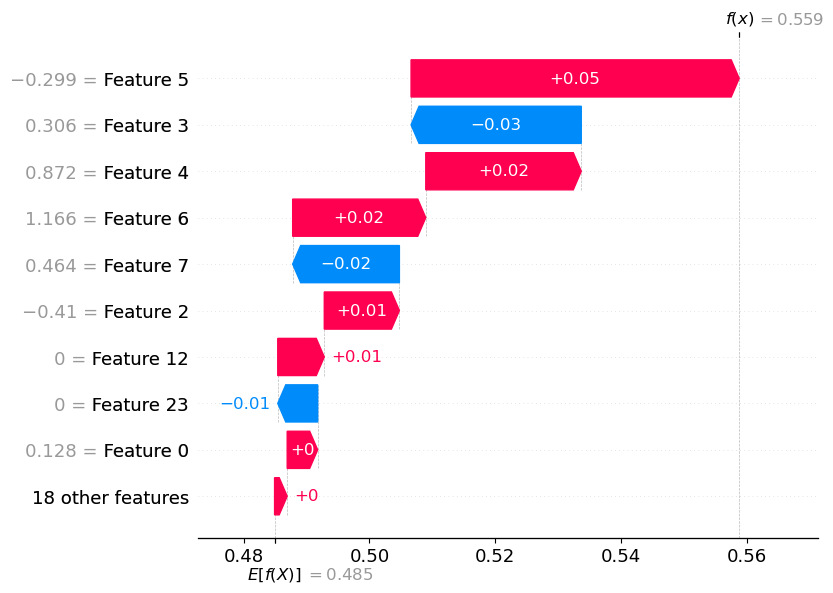

In [59]:
import shap

# Fit the best pipeline on the training data
pipeline_C.fit(X_train, y_train)

# Extract the trained regressor (RandomForestRegressor in pipeline_C)
regressor_C = pipeline_C.named_steps['regressor']

# Preprocess the training data using the preprocessing step in the pipeline
preprocessor_C = pipeline_C.named_steps['preprocessing']
X_train_preprocessed = preprocessor_C.transform(X_train)

# Initialize a SHAP explainer
explainer = shap.Explainer(regressor_C, X_train_preprocessed)

# Preprocess the test data
X_test_preprocessed = preprocessor_C.transform(X_test)

# Select an observation from the test set (e.g., the first observation)
observation_idx = 0  # Replace with the index of the observation you want to explain
observation = X_test_preprocessed[[observation_idx]]

# Compute SHAP values
shap_values = explainer(observation)

# Visualize the SHAP values for the selected observation
shap.plots.waterfall(shap_values[0])


Interpretation: The waterfall plot from SHAP will show you the impact of each feature on the prediction for the selected observation. Positive SHAP values indicate features that increase the prediction, while negative values indicate features that decrease it.

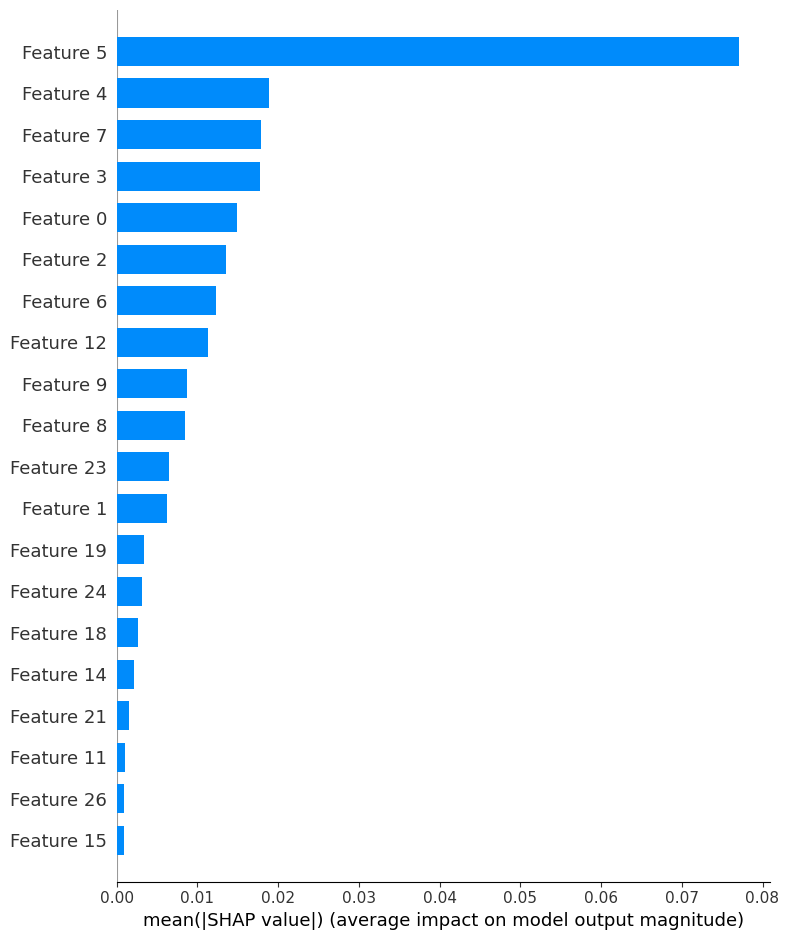

In [61]:


# Preprocess the training data using the preprocessing step in the pipeline
preprocessor_C = pipeline_C.named_steps['preprocessing']
X_train_preprocessed = preprocessor_C.transform(X_train)

# Initialize a SHAP explainer
explainer = shap.Explainer(regressor_C, X_train_preprocessed)

# Compute SHAP values for the entire training set
shap_values_all = explainer(X_train_preprocessed)

# Summarize feature importance across all observations with a bar plot
shap.summary_plot(shap_values_all, X_train_preprocessed, plot_type='bar')


*(Answer here.)*

Interpretation: The summary plot (plot_type='bar') will show you the average magnitude of SHAP values for each feature across the training set. Features with larger average SHAP values are more important in explaining the model's predictions.

3. Feature Removal and Testing Impact
Identifying Features to Remove:
To determine which features might be candidates for removal:

Based on SHAP Values: Look for features with consistently low or near-zero SHAP values across the training set. These features contribute less to model predictions and could potentially be candidates for removal.
Testing Impact on Model Performance:
Feature Removal Experiment: Perform a controlled experiment where you train and evaluate the model with and without specific features.

Conclusion
Using SHAP values allows you to gain insights into how each feature contributes to model predictions, identify important features, and assess the impact of feature removal on model performance. This process helps in understanding model behavior and potentially improving model interpretability and performance.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.